In [387]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error


In [388]:
ls C:\Users\AlexandruDaia\Downloads\restaurant\train.csv

 Volume in drive C has no label.
 Volume Serial Number is 8ABE-6AA5

 Directory of C:\Users\AlexandruDaia\Downloads\restaurant\train.csv

12/16/2024  02:38 PM    <DIR>          .
12/17/2024  11:27 AM    <DIR>          ..
12/16/2024  02:38 PM            18,885 train.csv
               1 File(s)         18,885 bytes
               2 Dir(s)  18,159,710,208 bytes free


In [389]:
train=pd.read_csv('C:\\Users\\AlexandruDaia\\Downloads\\restaurant\\train.csv\\train.csv')

In [390]:
train.head(3)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0


In [391]:
id=train['Id']
 

In [392]:
y=train['revenue']

In [393]:
feats=[col for col in train.columns if col.startswith('P')]

In [394]:
train=train[feats]

In [395]:
g=list(train['P29'].astype(int))
c=list(train['P12'].astype(int))
print('g ',g[:100])
print('c ',c[:100])

g  [3, 3, 3, 7, 3, 5, 3, 2, 3, 2, 2, 3, 3, 3, 3, 7, 2, 1, 3, 3, 3, 1, 7, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 1, 5, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 7, 5, 3, 3, 7, 3, 3, 1, 3, 3, 3, 7, 1, 0, 2, 0, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 7, 3, 7, 2, 3, 3, 2, 1, 3, 1]
c  [5, 5, 5, 10, 5, 8, 5, 3, 5, 10, 10, 5, 5, 5, 5, 10, 5, 5, 5, 3, 5, 3, 10, 4, 5, 5, 5, 4, 4, 2, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 2, 3, 10, 5, 5, 10, 5, 5, 4, 10, 4, 5, 4, 5, 2, 5, 3, 5, 5, 5, 10, 8, 5, 5, 10, 5, 5, 3, 5, 5, 5, 10, 4, 4, 8, 3, 5, 4, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 8, 5, 8, 4, 5, 5, 4, 5, 4, 3]


In [396]:
np.unique(g,return_counts=True)

(array([0, 1, 2, 3, 5, 7]), array([ 2, 12, 25, 80,  4, 14], dtype=int64))

In [397]:
np.unique(c,return_counts=True)

(array([ 2,  3,  4,  5,  6,  8, 10]),
 array([ 4,  8, 26, 76,  2,  6, 15], dtype=int64))

In [398]:
translate=[]
for  i in range(len(g)):
    if c not in [2,3,5]:
        translate.append(g[i])
    else:
        translate.append(c[i])

In [399]:
train['translate']=translate

In [400]:
g=list(train['P23'])
c=list(train['P20'].astype(int))
print('g ',g[:100])
print('c ',c[:100])

g  [3, 2, 1, 10, 1, 5, 1, 2, 1, 10, 20, 3, 2, 1, 2, 5, 1, 1, 2, 1, 5, 1, 10, 1, 3, 1, 2, 5, 3, 1, 1, 1, 1, 1, 1, 5, 3, 5, 1, 2, 1, 5, 20, 1, 1, 5, 2, 5, 5, 5, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 10, 5, 1, 1, 5, 1, 2, 3, 1, 1, 2, 5, 5, 5, 25, 4, 1, 1, 10, 4, 3, 1, 2, 1, 3, 1, 2, 2, 1, 1, 5, 2, 25, 1, 1, 1, 3, 5, 1, 1]
c  [4, 2, 1, 12, 2, 6, 4, 5, 1, 3, 15, 5, 4, 4, 3, 9, 4, 1, 5, 1, 5, 5, 12, 2, 5, 1, 5, 5, 5, 1, 1, 2, 1, 1, 4, 5, 5, 3, 4, 5, 5, 5, 15, 1, 3, 15, 5, 5, 5, 3, 5, 4, 1, 4, 2, 1, 5, 2, 3, 3, 15, 12, 1, 1, 9, 1, 3, 5, 1, 1, 5, 9, 5, 5, 15, 5, 4, 5, 12, 3, 5, 4, 4, 4, 3, 4, 5, 5, 1, 1, 9, 2, 15, 5, 2, 1, 2, 5, 5, 5]


In [401]:
np.unique(g,return_counts=True)

(array([ 1,  2,  3,  4,  5, 10, 15, 20, 25]),
 array([65, 20, 11,  4, 25,  6,  1,  2,  3], dtype=int64))

In [402]:
np.unique(c,return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  9, 12, 15]),
 array([28, 16, 16, 16, 41,  1,  5,  5,  9], dtype=int64))

In [403]:
translate=[]
for  i in range(len(g)):
    if c not in [1,2,5]:
        translate.append(g[i])
    else:
        translate.append(c[i])

In [404]:
train['translate2']=translate
train

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,translate,translate2
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,3,4,5,5,4,3,4,3,3
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,0,3,2
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,3,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,25,12,10,6,18,12,12,6,7,10
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,5,1,3,2,3,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,0,0,0,0,0,0,0,0,3,1
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,0,0,0,0,0,0,0,0,3,1
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,3,2
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,0,3,1


In [405]:
np.unique(train['translate2'],return_counts=True)

(array([ 1,  2,  3,  4,  5, 10, 15, 20, 25], dtype=int64),
 array([65, 20, 11,  4, 25,  6,  1,  2,  3], dtype=int64))

In [408]:
 
train['dna_counts']=0
 

In [413]:
train['dna_counts']=train['translate2'].replace(train.translate2.value_counts().to_dict())

In [414]:
train

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P31,P32,P33,P34,P35,P36,P37,translate,translate2,dna_counts
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,3,4,5,5,4,3,4,3,3,11
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,3,2,20
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,3,1,65
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,12,10,6,18,12,12,6,7,10,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,1,3,2,3,4,3,3,3,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,0,0,0,0,0,0,0,3,1,65
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,0,0,0,0,0,0,0,3,1,65
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,3,2,20
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,3,1,65


In [415]:
model=LogisticRegression()
#model=xgb.XGBRegressor(n_estimators=1)

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

In [418]:
model.fit(X_train,y_train)

C:\Users\AlexandruDaia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [419]:
pred=model.predict(X_test)

In [420]:
np.sqrt(mean_squared_error(y_test,pred))

3864329.7822030187

<AxesSubplot: ylabel='Feature'>

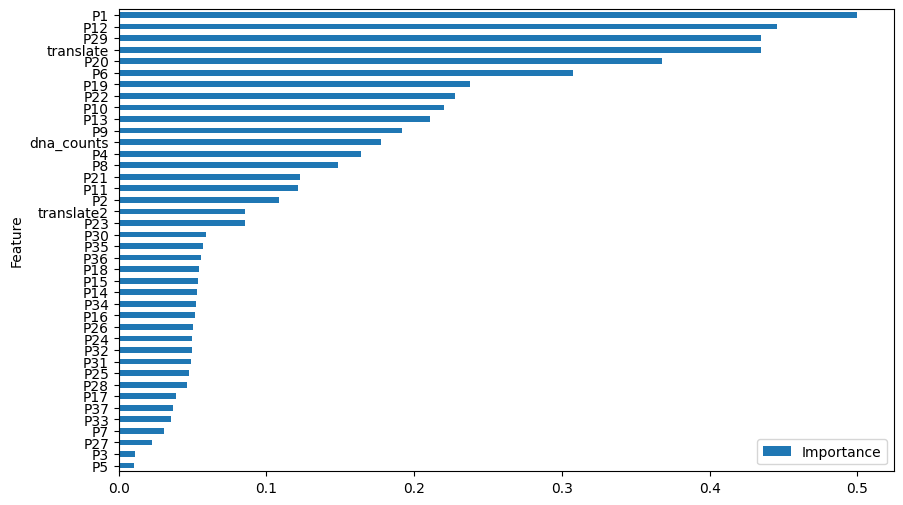

In [421]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [422]:
np.corrcoef(train['P23'],train['P20'])

array([[1.        , 0.80119275],
       [0.80119275, 1.        ]])

In [423]:
np.corrcoef(train['P12'],train['P23'])

array([[1.        , 0.57858667],
       [0.57858667, 1.        ]])

In [424]:
test=pd.read_csv('C:\\Users\\AlexandruDaia\\Downloads\\restaurant\\test.csv\\test.csv')

In [425]:
test.head((3))

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [426]:
id_test=test['Id']

In [427]:
test=test[feats]

In [428]:
g=list(test['P29'])
c=list(test['P12'].astype(int))
print('g ',g[:100])
print('c ',c[:100])

g  [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.5, 5.0, 3.0, 0.0, 0.0, 3.0, 1.0, 2.5, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.5, 7.5, 2.0, 3.0, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 7.5, 3.0, 3.0, 3.0, 7.5, 7.5, 1.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 7.5, 3.0, 7.5, 3.0, 3.0, 3.0, 7.5, 3.0, 3.0, 1.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 7.5, 3.0, 7.5, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.5, 3.0, 2.0, 1.0, 3.0]
c  [3, 4, 5, 4, 5, 5, 5, 4, 4, 6, 8, 5, 6, 3, 5, 3, 3, 5, 8, 10, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 4, 10, 5, 5, 5, 4, 5, 3, 4, 5, 5, 5, 5, 5, 5, 10, 5, 4, 5, 8, 5, 5, 3, 3, 3, 4, 5, 4, 5, 4, 5, 3, 5, 4, 4, 4, 5, 10, 3, 8, 5, 3, 5, 5, 4, 4, 5, 4, 3, 5, 5, 5, 10, 5, 4, 5, 5]


In [429]:
np.unique(g,return_counts=True)

(array([ 0. ,  1. ,  2. ,  2.5,  3. ,  5. ,  7.5, 10. ]),
 array([ 3083,  9495, 17339,  1286, 55099,  3112, 10282,   304],
       dtype=int64))

In [430]:
np.unique(c,return_counts=True)

(array([ 2,  3,  4,  5,  6,  8, 10]),
 array([ 1275,  9206, 25642, 49618,  2474,  3688,  8097], dtype=int64))

In [431]:
translate=[]
for  i in range(len(g)):
    if c not in [2,3,5]:
        translate.append(g[i])
    else:
        translate.append(c[i])

In [432]:
test['translate']=translate

In [433]:
g=list(test['P23'])
c=list(test['P20'].astype(int))
print('g ',g[:100])
print('c ',c[:100])

g  [4, 1, 5, 2, 1, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 5, 10, 2, 1, 1, 1, 2, 1, 1, 5, 1, 1, 5, 4, 5, 1, 4, 1, 5, 5, 1, 5, 1, 1, 2, 2, 1, 10, 5, 3, 1, 2, 10, 1, 4, 1, 1, 3, 15, 3, 3, 1, 4, 1, 3, 5, 1, 1, 4, 4, 5, 1, 3, 4, 3, 1, 2, 2, 1, 5, 2, 1, 1, 2, 1, 5, 1, 4, 2, 5]
c  [5, 5, 5, 4, 5, 5, 5, 4, 5, 15, 3, 1, 5, 5, 1, 4, 15, 12, 3, 5, 1, 5, 3, 5, 5, 1, 5, 4, 1, 3, 2, 15, 5, 3, 1, 1, 5, 1, 3, 6, 5, 4, 15, 2, 3, 1, 3, 15, 5, 2, 5, 5, 1, 3, 1, 4, 2, 4, 6, 5, 1, 4, 15, 6, 4, 5, 5, 5, 15, 5, 4, 4, 5, 1, 5, 4, 3, 1, 5, 5, 6, 5, 5, 5, 5, 1, 5, 5, 5, 15, 4, 5, 1, 5, 1, 15, 5, 1, 1, 6]


In [434]:
np.unique(g,return_counts=True)

(array([ 1,  2,  3,  4,  5, 10, 15, 20, 25]),
 array([39890, 16741, 11561,  8512, 14340,  3038,  2198,  1231,  2489],
       dtype=int64))

In [435]:
np.unique(c,return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  9, 12, 15]),
 array([19478,  7887, 11931, 12090, 36731,  1825,   322,  1954,  7782],
       dtype=int64))

In [436]:
translate=[]
for  i in range(len(g)):
    if c not in [1,2,5]:
        translate.append(g[i])
    else:
        translate.append(c[i])

In [437]:
test['translate2']=translate
test

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,translate,translate2
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,0,0,0,0,3.0,4
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,0,0,0,0,3.0,1
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,0,0,0,0,3.0,5
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,0,4,0,0,0,0,0,0,3.0,2
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,0,0,0,0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,...,0,0,0,0,0,0,0,0,3.0,2
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,...,5,0,0,0,4,0,0,0,3.0,2
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,...,5,5,3,2,4,4,4,2,1.0,5
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,...,0,0,0,4,0,0,0,0,5.0,15


In [438]:
train['translate']==train['translate2']

0       True
1      False
2      False
3      False
4      False
       ...  
132    False
133    False
134    False
135    False
136    False
Length: 137, dtype: bool

In [441]:
 
test['dna_counts']=0
test['dna_counts']=test['translate2'].replace(test.translate2.value_counts().to_dict())

In [442]:
pred=model.predict(test)

In [443]:
samp=pd.read_csv('sampleSubmission.csv')

In [444]:
samp.head(3)

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6


In [445]:
samp['Prediction']=pred

In [446]:
samp

,Id,Prediction
0,0,3570392.0
1,1,3570392.0
2,2,3570392.0
3,3,3570392.0
4,4,3570392.0
...,...,...
99995,99995,3570392.0
99996,99996,3570392.0
99997,99997,3570392.0
99998,99998,3570392.0


In [447]:
samp.to_csv('samp7.csv',index=False)

In [187]:
a=pd.read_csv('samp2.csv')

In [188]:
b=pd.read_csv('samp3.csv')

In [189]:
c=pd.read_csv('samp4.csv')

In [190]:
d=a

In [192]:
d['Prediction']=(a['Prediction']+b['Prediction'])/2

In [193]:
d.to_csv('avg.csv',index=False)